#### !!IMPORTANTE INSTALAR¡¡¡

- pip install googletrans==4.0.0-rc1
- pip install geodatasets
- python -m pip install geopandas
- python -m pip install seaborn

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [31]:
# Cargar el dataset del Titanic (puedes cambiar la ruta si tienes el archivo localmente)
vid = "../data/data_limpia.csv"
df = pd.read_csv(vid)

## CARGA DE ARCHIVO JSON 

In [32]:
# Abrir y leer el archivo JSON
with open('../data/KR_category_id.json', 'r') as file:
    data = json.load(file)  # Cargar el contenido del archivo en un diccionario o lista de Python

# Mostrar el contenido
print(data)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [33]:
dfjson = pd.DataFrame(data)
dfjson.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [34]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [35]:
# Crear un diccionario para mapear los IDs con los nombres de las categorías
category_mapping = {int(item['id']): item['snippet']['title'] for item in data['items'] if item['snippet']['assignable']}

# Agregar una columna con el nombre de la categoría en el DataFrame principal
df['category_name'] = df['category_id'].map(category_mapping)

### 1. ¿Qué categorías de videos son las de mayor tendencia?

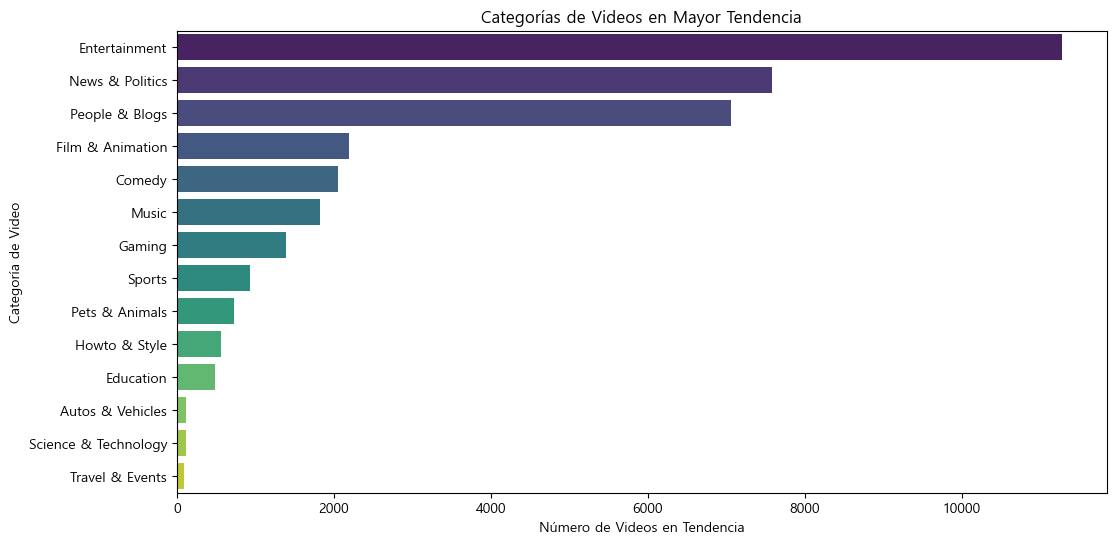

In [36]:
category_trending_count = df['category_name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_trending_count.values, y=category_trending_count.index, hue=category_trending_count.index, dodge=False, palette="viridis", legend=False)
plt.title("Categorías de Videos en Mayor Tendencia")
plt.xlabel("Número de Videos en Tendencia")
plt.ylabel("Categoría de Video")
plt.show()

### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

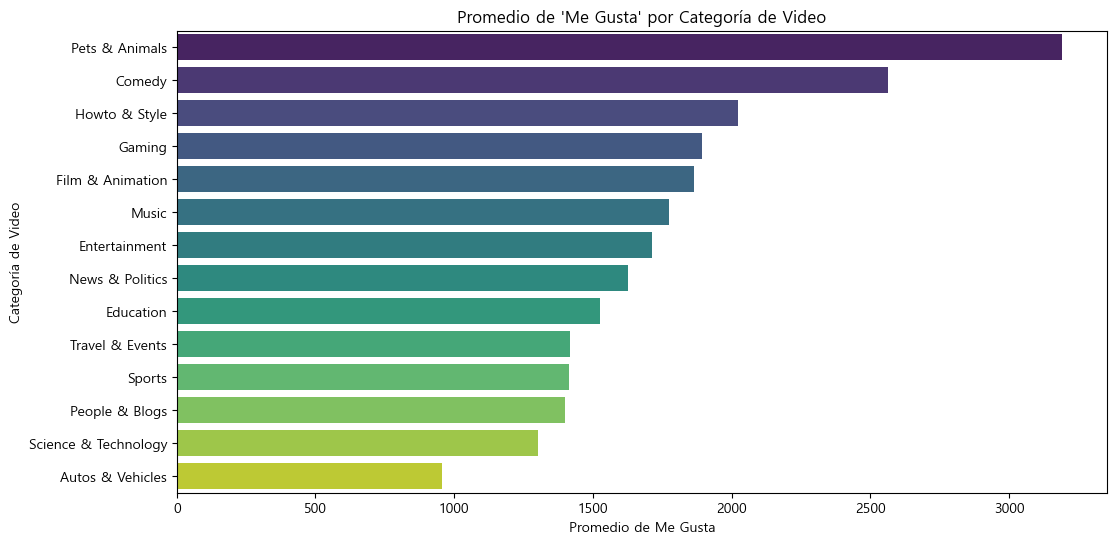

In [37]:
avg_likes_by_category = df.groupby('category_name')['likes'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_likes_by_category.values, y=avg_likes_by_category.index, hue=avg_likes_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Promedio de 'Me Gusta' por Categoría de Video")
plt.xlabel("Promedio de Me Gusta")
plt.ylabel("Categoría de Video")
plt.show()

### 3. ¿Qué categorías de videos tienen la mejor proporción de “Me gusta” / “No me gusta”?

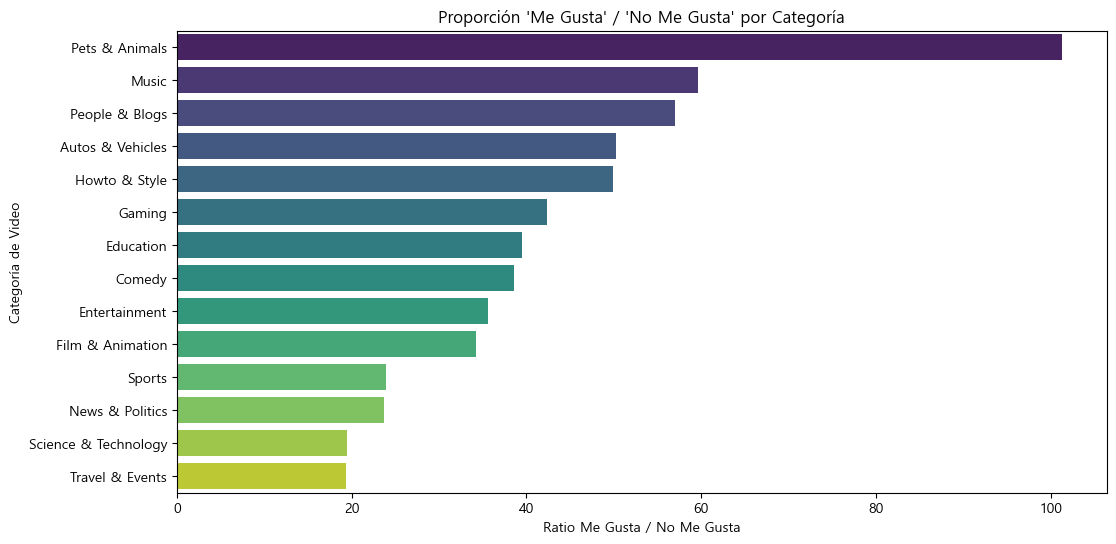

In [38]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # +1 para evitar división por cero
# Calcular el ratio de likes/dislikes por categoría
like_dislike_ratio_by_category = df.groupby('category_name')['like_dislike_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=like_dislike_ratio_by_category.values, y=like_dislike_ratio_by_category.index, hue=like_dislike_ratio_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Me Gusta' / 'No Me Gusta' por Categoría")
plt.xlabel("Ratio Me Gusta / No Me Gusta")
plt.ylabel("Categoría de Video")
plt.show()

### 4. ¿Qué categorías de videos tienen la mejor proporción de “Vistas” / “Comentarios”?

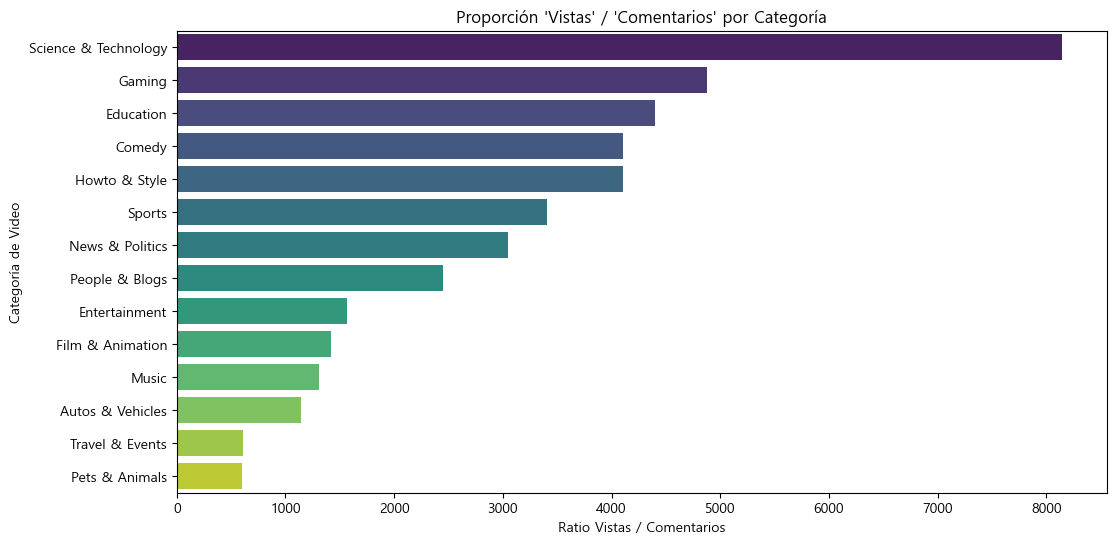

In [39]:
df['view_comment_ratio'] = df['views'] / (df['comment_count'] + 1)
# Calcular el ratio de views/comment_count por categoría
view_comment_ratio_by_category = df.groupby('category_name')['view_comment_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=view_comment_ratio_by_category.values, y=view_comment_ratio_by_category.index,hue=view_comment_ratio_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Vistas' / 'Comentarios' por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría de Video")
plt.show()

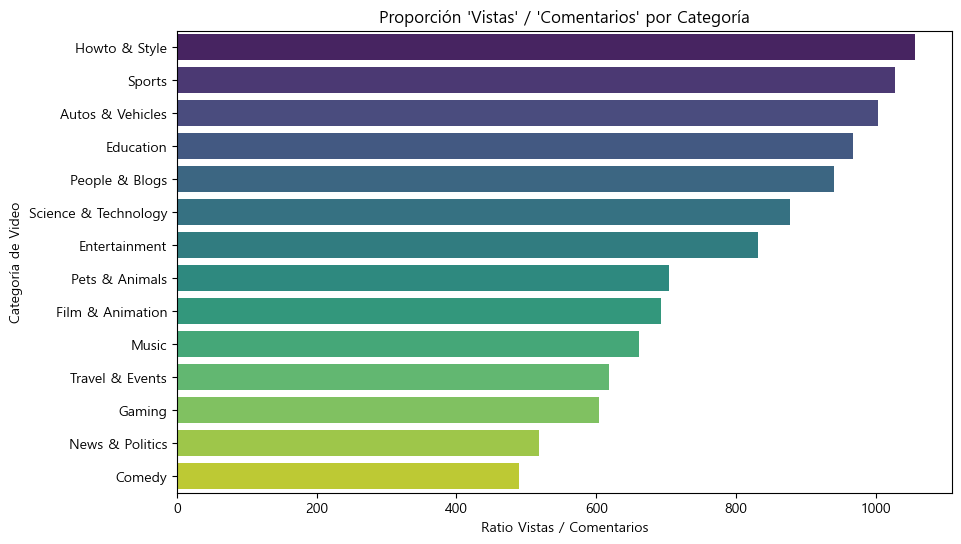

In [40]:
df = df[df['comment_count'] > 0]

# Calcular la proporción "Vistas/Comentarios" para cada video
df['views_comments_ratio'] = df['views'] / df['comment_count']

# Calcular el promedio de "Vistas/Comentarios" por categoría
avg_views_comments_ratio = df.groupby('category_name')['views_comments_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_views_comments_ratio, y=avg_views_comments_ratio.index, hue=avg_views_comments_ratio.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Vistas' / 'Comentarios' por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría de Video")
plt.show()

### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

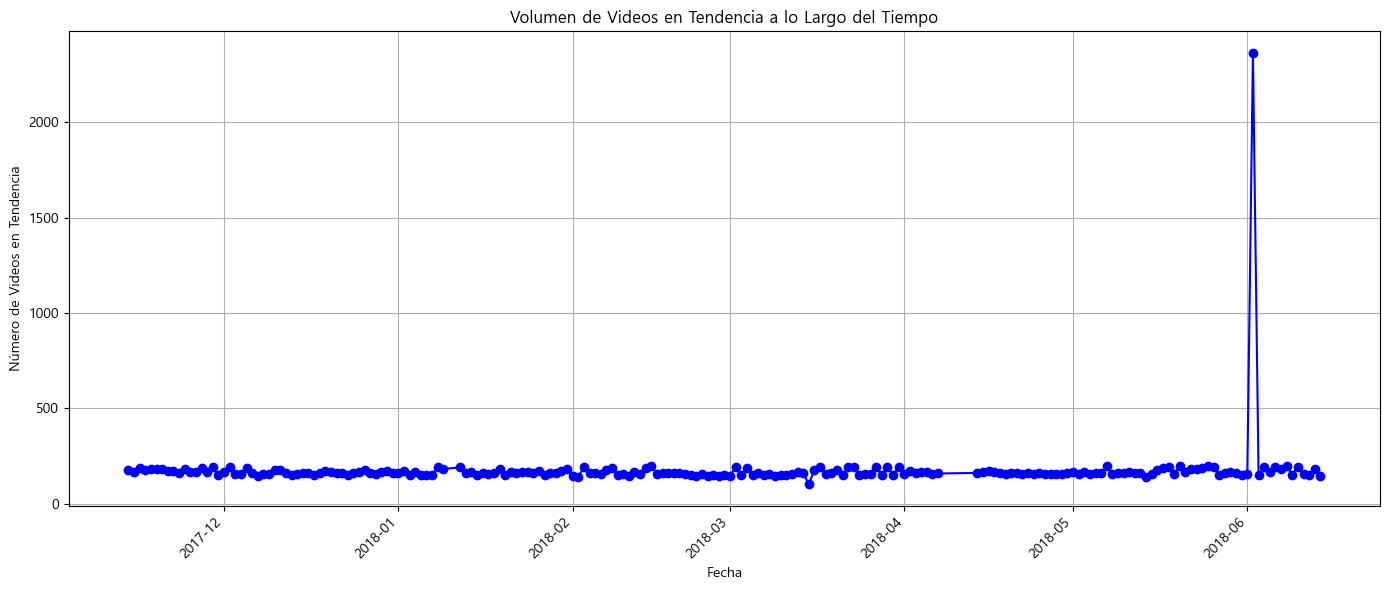

In [41]:
# Configurar la fuente para admitir caracteres coreanos
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False 

# Convertir la columna 'trending_date' a tipo datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')

# Contar la cantidad de videos en tendencia por fecha
videos_by_date = df.groupby('trending_date').size()

plt.figure(figsize=(14, 6))
videos_by_date.plot(kind='line', marker='o', color='b')
plt.title("Volumen de Videos en Tendencia a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Videos en Tendencia")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A lo largo del tiempo, la cantidad de videos en tendencia parece mantenerse estable en un nivel bajo, con ligeras variaciones entre fechas.
Observamos un pico muy pronunciado alrededor de mayo o junio de 2018, donde el número de videos en tendencia subió drásticamente, seguido de una rápida caída a los niveles previos de estabilidad. Este pico podría deberse a un evento especial o lanzamiento de contenido altamente popular que generó una cantidad inusualmente alta de videos en tendencia.

In [42]:
from googletrans import Translator

may_june_2018_data = df[(df['trending_date'] >= '2018-05-01') & (df['trending_date'] <= '2018-06-30')]

top_trending_videos = may_june_2018_data['title'].value_counts().head(10)

translator = Translator()

top_trending_videos_translated = {title: translator.translate(title, src='ko', dest='es').text for title in top_trending_videos.index}

for title, freq in top_trending_videos.items():
    print(f"Título original: {title} | Traducción: {top_trending_videos_translated[title]} | Frecuencia: {freq}")

Título original: 브베 실시간 스트리밍 | Traducción: Transmisión VB real | Frecuencia: 2185
Título original: MBC 예능 뜻밖의 Q 장삐쭈 방송분 | Traducción: MBC Entertainment inesperado Q | Frecuencia: 9
Título original: 나경원 의원실 비서 욕설 녹취록 추가 공개 | Traducción: Na Kyung -won, miembro del secretario del Secretario Parlamentario, divulgación adicional | Frecuencia: 9
Título original: 김어준의 다스 뵈이다 18회 MB근황 + 지방선거 | Traducción: Kim Eo -J Darth Snicks Episodio 18 MB + elecciones locales | Frecuencia: 9
Título original: 회장님의 부귀영화 [FULL] -Booyoung Chairman Corruption-18/05/15-MBC PD수첩 1155회 | Traducción: Presidente del Presidente de la película [Full] -Booyung Presidente Corruption-18/05/15-MBC PD Notebook Episodio 1155 | Frecuencia: 9
Título original: 남자 BJ들한테 자기야~♥ 우리집에 올래? 했더니 반응이.. - 이설 | Traducción: Los hombres BJS son para mí ~ ♥ ¿Te gustaría venir a mi casa?Después de hacerlo, la reacción ..- Lee Seol | Frecuencia: 8
Título original: 시청자제보로 18년만에 선생님 찾았습니다ㅠㅠ!!! | Traducción: Encontré un maestro en 18 años con lo

Streaming en Vivo de Juegos o Contenido Específico (브베 실시간 스트리밍): Este título aparece con una frecuencia significativamente alta, lo cual sugiere que algún evento de transmisión en vivo, probablemente relacionado con un juego o un fenómeno viral, pudo haber captado mucho interés.

Investigaciones y Escándalos:

"Booyoung Chairman Corruption" (회장님의 부귀영화): Un episodio de MBC PD수첩 (PD Notebook) que trata sobre la corrupción de un presidente de empresa tuvo una alta frecuencia en la lista de videos en tendencia.
"Grabar de insultos de un asistente de la oficina de un congresista" (나경원 의원실 비서 욕설 녹취록 추가 공개): Otro video que parece estar relacionado con una controversia política.
BTS (방탄소년단):

Videos relacionados con el grupo BTS, especialmente el lanzamiento del video musical "FAKE LOVE" y su presentación en los Billboard, están en la lista de los más vistos. Esto refleja el enorme interés global y nacional en el grupo durante este período.
Películas y Cultura Popular:

"Deadpool 2": Un video sobre las escenas post-créditos de Deadpool 2 también fue muy popular, indicando interés en el lanzamiento de esta película en Corea del Sur.
Problemas Sociales y Políticos:

Contenido relacionado con Kim Eo-jun y otros comentarios políticos atrajeron atención, lo cual es común en Corea del Sur, donde los videos de contenido político o social pueden volverse virales rápidamente.

### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

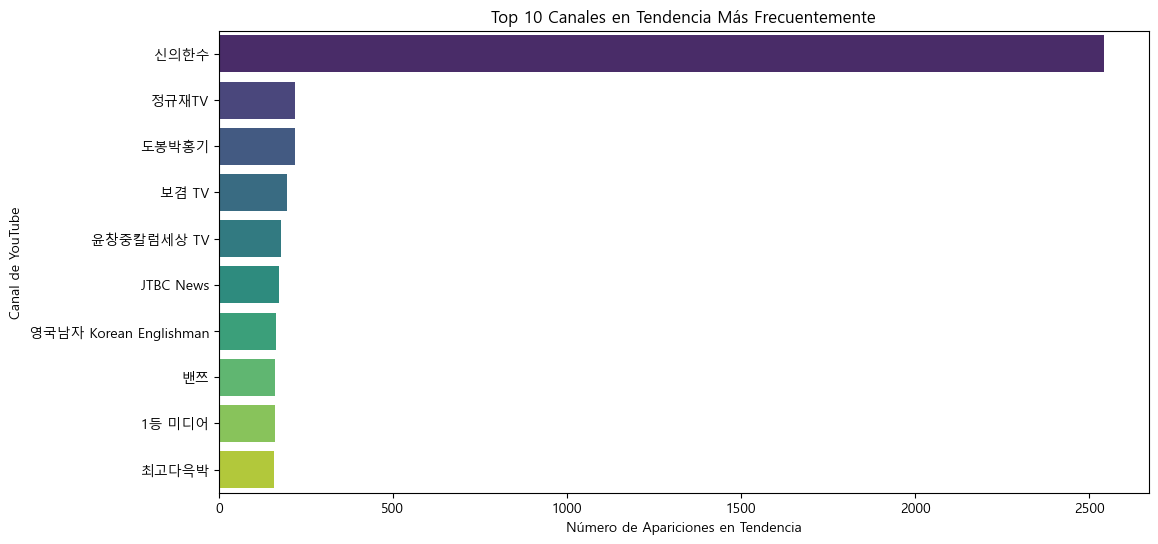

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24417 (\N{CJK UNIFIED IDEOGRAPH-5F61}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


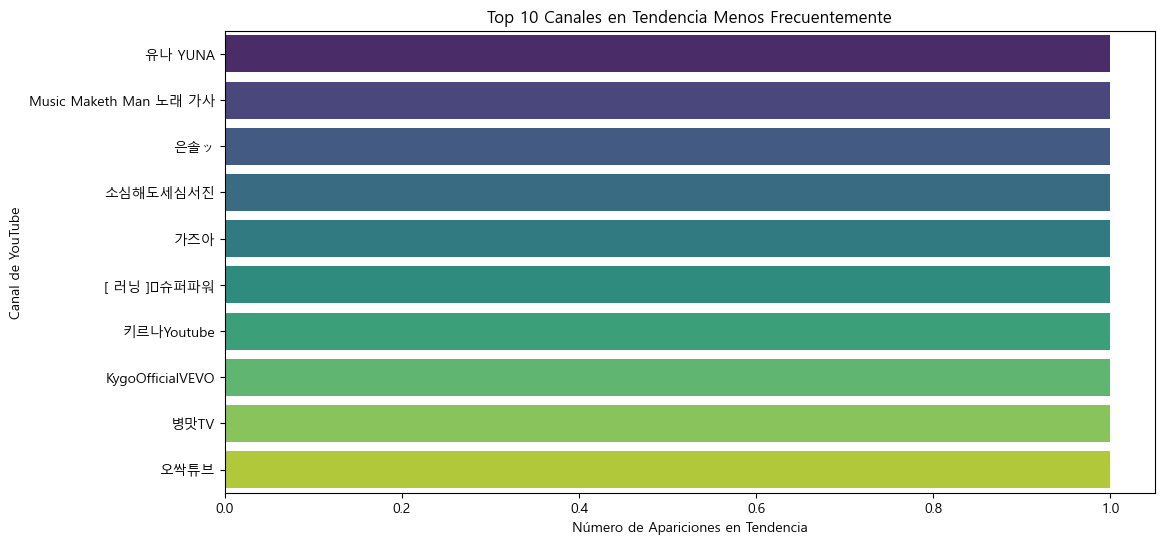

In [43]:
# Contar la frecuencia de cada canal en la columna 'channel_title'
channel_trending_count = df['channel_title'].value_counts()

# Seleccionar los top 10 canales más y menos frecuentemente en tendencia
top_trending_channels = channel_trending_count.head(10)
least_trending_channels = channel_trending_count.tail(10)

# Configurar el gráfico para los canales más frecuentemente en tendencia
plt.figure(figsize=(12, 6))
sns.barplot(x=top_trending_channels.values, y=top_trending_channels.index, hue=top_trending_channels.index, dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Canales en Tendencia Más Frecuentemente")
plt.xlabel("Número de Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")
plt.show()

# Configurar el gráfico para los canales menos frecuentemente en tendencia
plt.figure(figsize=(12, 6))
sns.barplot(x=least_trending_channels.values, y=least_trending_channels.index, hue=least_trending_channels.index, dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Canales en Tendencia Menos Frecuentemente")
plt.xlabel("Número de Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")
plt.show()


### 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [44]:
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

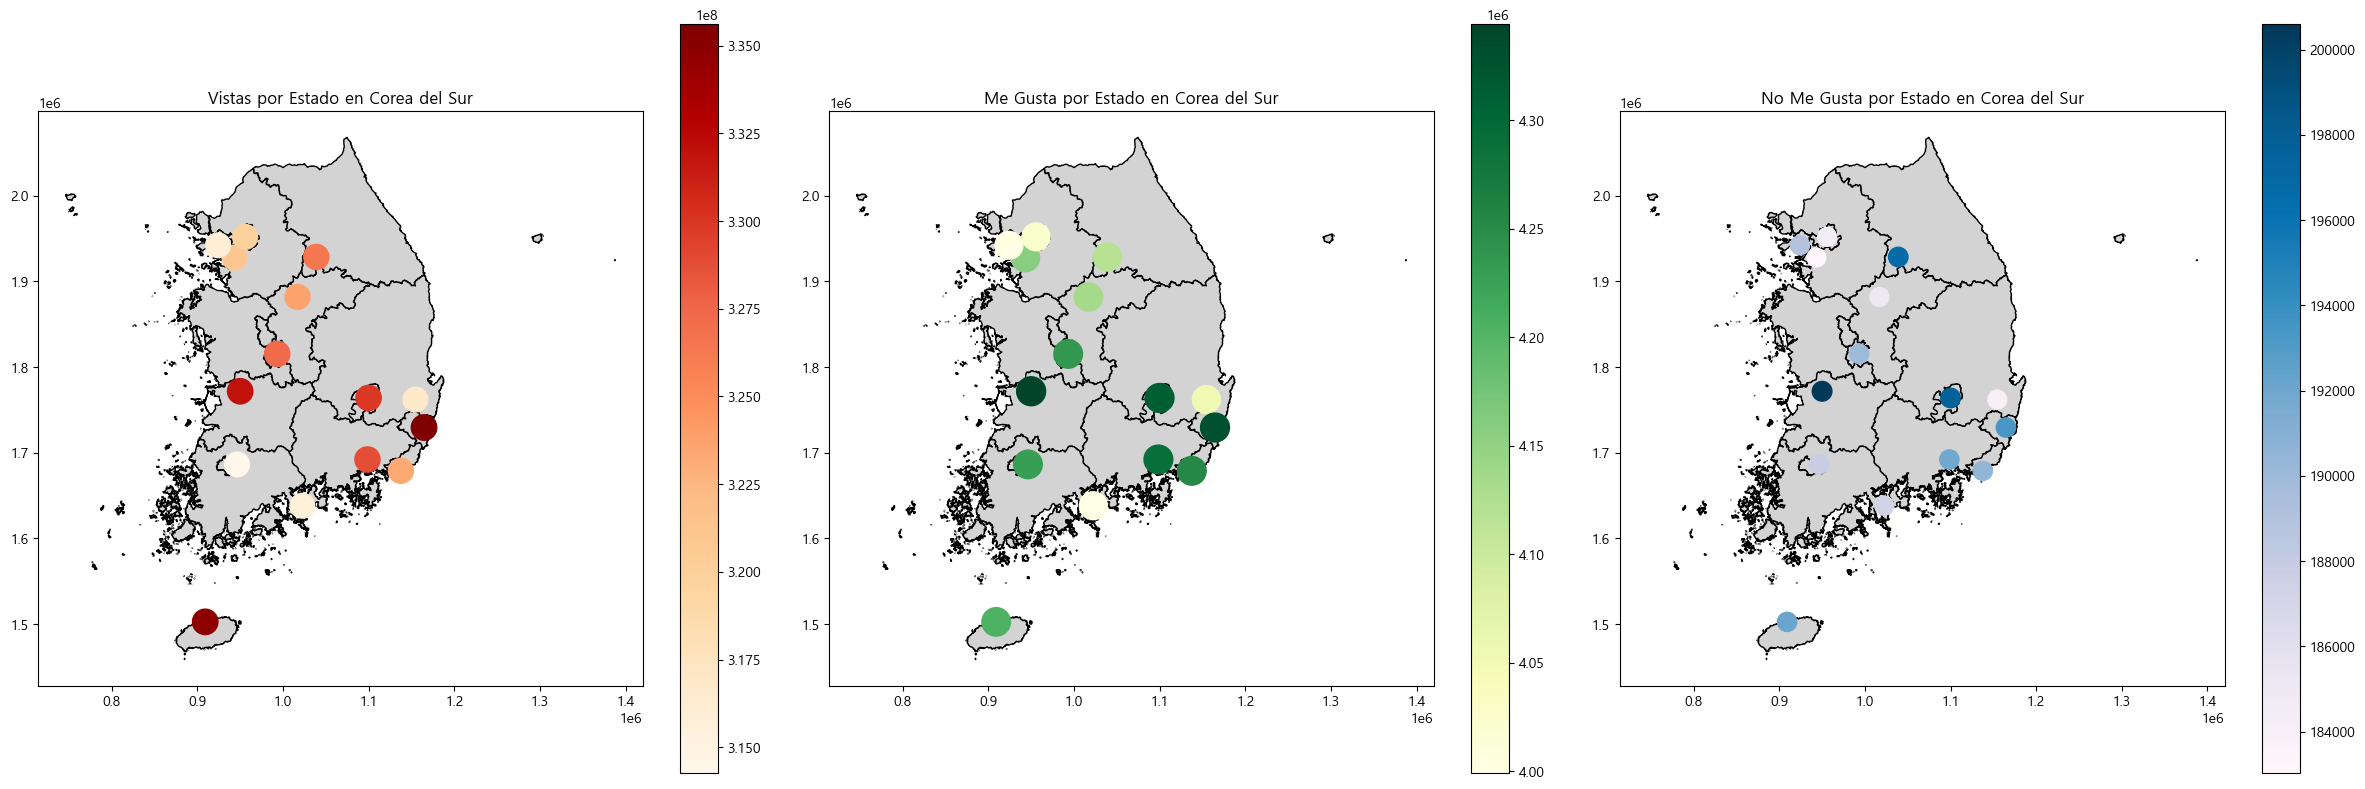

In [45]:
"""estado_agrupado = df.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
}).reset_index()
gdf = gpd.GeoDataFrame(estado_agrupado, geometry=gpd.GeoSeries.from_wkt(df['geometry']))"""
estado_agrupado = df.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'first', 
    'lon': 'first'
}).reset_index()

# Crear la columna 'geometry' con los puntos geográficos
estado_agrupado['geometry'] = estado_agrupado.apply(lambda x: Point((x['lon'], x['lat'])), axis=1)

# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(estado_agrupado, geometry='geometry')
gdf = gdf.set_crs("EPSG:4326")  # Aseguramos que está en el sistema de coordenadas adecuado

# Convertir a CRS proyectado para una visualización precisa
gdf = gdf.to_crs("EPSG:5179")

# Cargar el shapefile de Corea del Sur con divisiones administrativas como fondo del mapa
admin_gdf = gpd.read_file('../data/KR_Mapa/gadm41_KOR_1.shp')
admin_gdf = admin_gdf.to_crs("EPSG:5179")

# Configuración de la figura para el mapa
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

# Fondo de Corea del Sur y superposición de los datos de "Vistas"
admin_gdf.plot(ax=ax[0], color='lightgrey', edgecolor='black')
gdf.plot(column='views', cmap='OrRd', legend=True, ax=ax[0], markersize=gdf['views'] / 1000000)
ax[0].set_title('Vistas por Estado en Corea del Sur')

# Fondo de Corea del Sur y superposición de los datos de "Me gusta"
admin_gdf.plot(ax=ax[1], color='lightgrey', edgecolor='black')
gdf.plot(column='likes', cmap='YlGn', legend=True, ax=ax[1], markersize=gdf['likes'] / 10000)
ax[1].set_title('Me Gusta por Estado en Corea del Sur')

# Fondo de Corea del Sur y superposición de los datos de "No me gusta"
admin_gdf.plot(ax=ax[2], color='lightgrey', edgecolor='black')
gdf.plot(column='dislikes', cmap='PuBu', legend=True, ax=ax[2], markersize=gdf['dislikes'] / 1000)
ax[2].set_title('No Me Gusta por Estado en Corea del Sur')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [46]:
estado_agrupado = estado_agrupado.sort_values(by='views', ascending=False)

print("Estados con sus respectivas cantidades de Vistas, Me gusta y No me gusta:")
print(estado_agrupado)

Estados con sus respectivas cantidades de Vistas, Me gusta y No me gusta:
                 state        views      likes  dislikes        lat  \
14               Ulsan  335631713.0  4328408.0  193396.0  35.546731   
9                 Jeju  334825982.0  4204846.0  192101.0  33.510137   
10        Jeollabuk Do  332028876.0  4344604.0  200610.0  35.940970   
13    Taegu Gwangyoksi  329939120.0  4312266.0  197558.0  35.866789   
7     Gyeongsangnam Do  328709758.0  4290033.0  191933.0  35.219102   
3              Daejeon  327322338.0  4235558.0  189964.0  36.335546   
4           Gangwon Do  326381892.0  4118063.0  196756.0  37.355148   
1    Chungcheongbuk Do  323686525.0  4134908.0  185056.0  36.935251   
0                Busan  323323772.0  4252942.0  190461.0  35.095053   
6          Gyeonggi Do  321038986.0  4157123.0  183024.0  37.348068   
12              Seoul   319883176.0  4024255.0  184453.0  37.566349   
2                Daegu  316846218.0  4051693.0  183991.0  35.842759   
8  

In [47]:
estado_mayor_vistas = estado_agrupado.sort_values(by='views', ascending=False).head(1)
estado_mayor_likes = estado_agrupado.sort_values(by='likes', ascending=False).head(1)
estado_mayor_dislikes = estado_agrupado.sort_values(by='dislikes', ascending=False).head(1)

print("Estado con el mayor número de Vistas:")
print(estado_mayor_vistas[['state', 'views']])

print("\nEstado con el mayor número de Me gusta:")
print(estado_mayor_likes[['state', 'likes']])

print("\nEstado con el mayor número de No me gusta:")
print(estado_mayor_dislikes[['state', 'dislikes']])

Estado con el mayor número de Vistas:
    state        views
14  Ulsan  335631713.0

Estado con el mayor número de Me gusta:
           state      likes
10  Jeollabuk Do  4344604.0

Estado con el mayor número de No me gusta:
           state  dislikes
10  Jeollabuk Do  200610.0


### 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

In [48]:
avg_likes_trending = df['likes'].mean()
avg_dislikes_trending = df['dislikes'].mean()

# Mostrar los resultados
print("Promedio de 'Me Gusta' en Videos en Tendencia:", avg_likes_trending)
print("Promedio de 'No Me Gusta' en Videos en Tendencia:", avg_dislikes_trending)

# Evaluar si los videos en tendencia tienen más 'Me Gusta' que 'No Me Gusta'
if avg_likes_trending > avg_dislikes_trending:
    print("Los videos en tendencia suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').")
else:
    print("Los videos en tendencia no suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').")

Promedio de 'Me Gusta' en Videos en Tendencia: 1726.951538694658
Promedio de 'No Me Gusta' en Videos en Tendencia: 78.6101881698212
Los videos en tendencia suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').


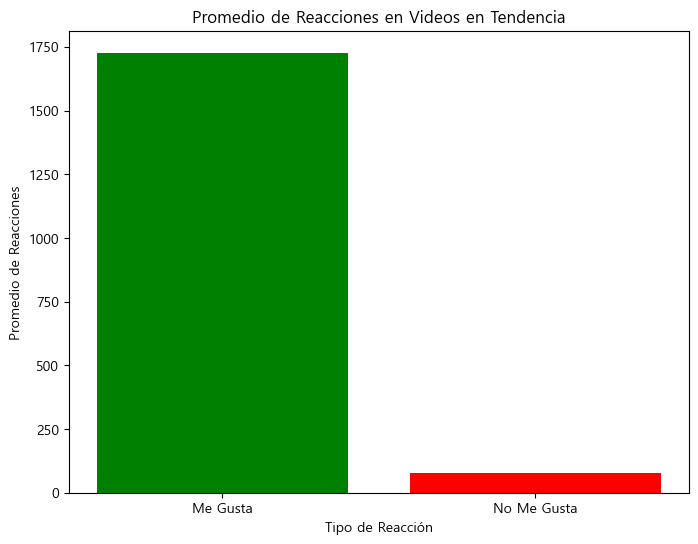

In [49]:
metrics = ['Me Gusta', 'No Me Gusta']
averages = [avg_likes_trending, avg_dislikes_trending]

plt.figure(figsize=(8, 6))
plt.bar(metrics, averages, color=['green', 'red'])
plt.title("Promedio de Reacciones en Videos en Tendencia")
plt.xlabel("Tipo de Reacción")
plt.ylabel("Promedio de Reacciones")
plt.show()

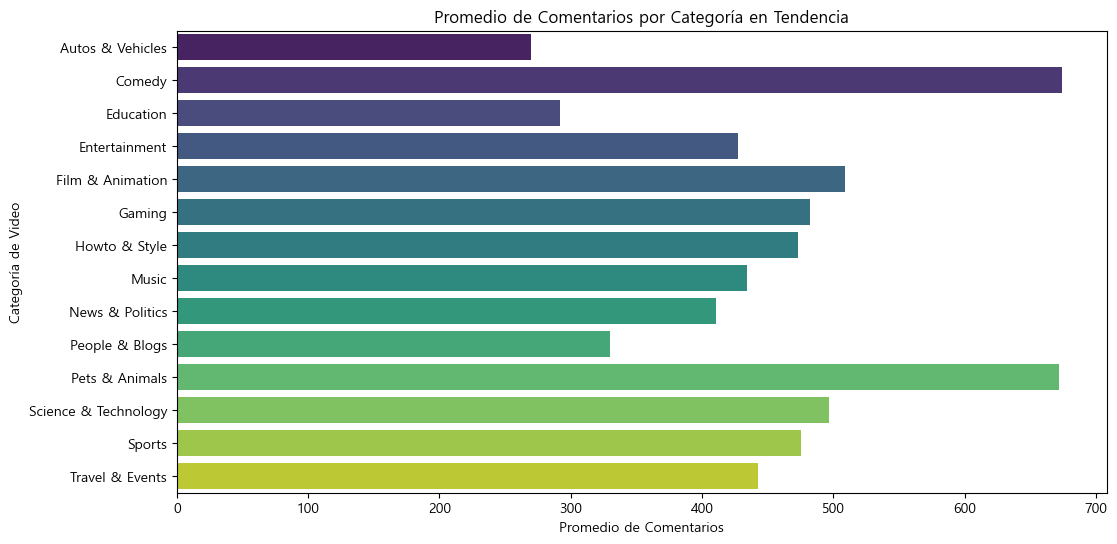

In [50]:
comments_by_category = df.groupby('category_name')['comment_count'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=comments_by_category.values, y=comments_by_category.index, hue=comments_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Promedio de Comentarios por Categoría en Tendencia")
plt.xlabel("Promedio de Comentarios")
plt.ylabel("Categoría de Video")
plt.show()


### 9. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

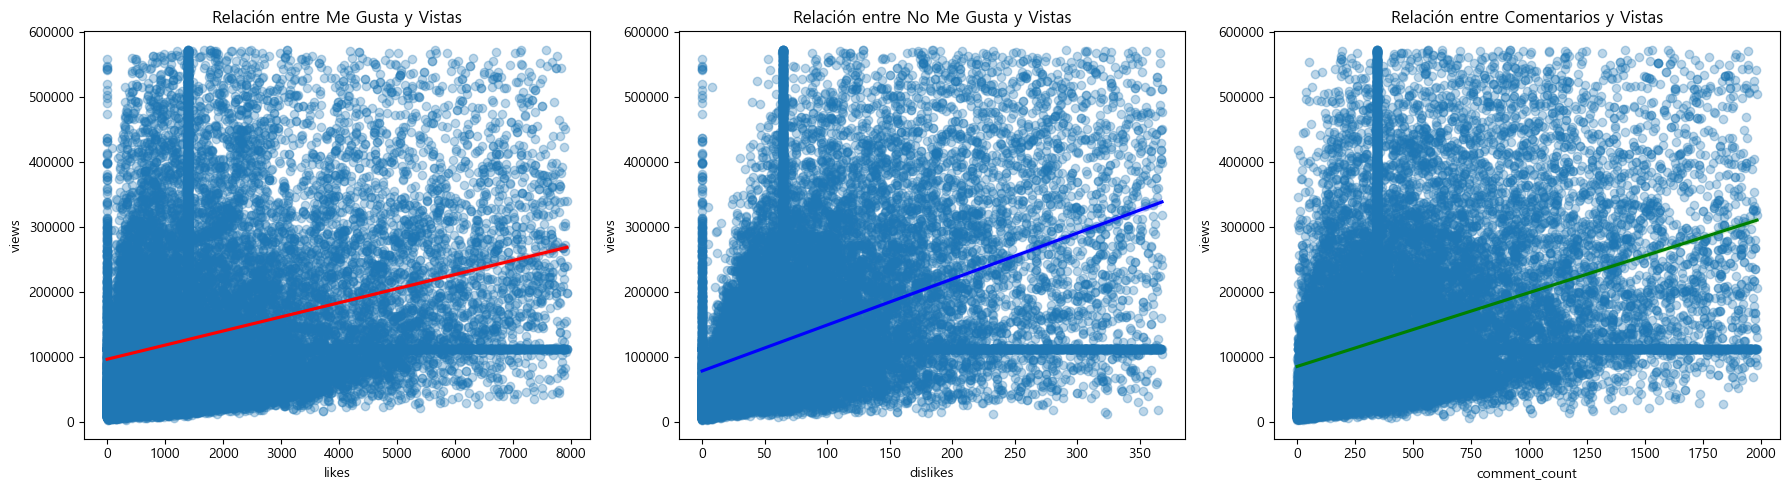

In [51]:
plt.figure(figsize=(18, 5))

# Relación entre Me Gusta y Vistas
plt.subplot(1, 3, 1)
sns.regplot(x='likes', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Relación entre Me Gusta y Vistas")

# Relación entre No Me Gusta y Vistas
plt.subplot(1, 3, 2)
sns.regplot(x='dislikes', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "blue"})
plt.title("Relación entre No Me Gusta y Vistas")

# Relación entre Comentarios y Vistas
plt.subplot(1, 3, 3)
sns.regplot(x='comment_count', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "green"})
plt.title("Relación entre Comentarios y Vistas")

plt.tight_layout()
plt.show()
